### Perceptron Learning Algorithm
---

This is one of the earliest and simplest forms of an artificial neuron.

>![](images/perceptron/bneuron.png)

>![](images/perceptron/percepneuron.png)

>![](images/perceptron/eq.png)

>Let us break it down

> <div style="color:lightseagreen">$z(\; \vec{x} \;) = \vec{w} .\vec{x}$ <br> $h(z) = sign(z)$ </div>

---
> 1) $f(x) = sign(x)$

>![](images/perceptron/signum.png)

> 2) $ z(\; \vec{x} \;) = \vec{w} . \vec{x}$

> This is the the equation of a hyperplane (a plane in 3D / a line in 2D )

> If $ \vec{w} = \langle a , b , c \rangle$ and $\vec{x} = \langle x,y,z \rangle$ = , then <div style="color:red">$\\\;\\  w^T  x = \vec{w} . \vec{x} = ax + by + cz$ </div>

---
><div style="color:cyan">Combining the above two equations, we have - 
$\\h(\vec{x}) = h(z(\vec{x})) =  sign(w^T x) = \begin{cases} 
      1 & w^Tx = ax + by + cz \geq 0 \\
      0 & w^Tx = ax + by + cz = 0 \\
      -1 & w^Tx = ax + by + cz \leq 0 
   \end{cases}
   $</div>

>![](images/perceptron/planeeq.png)



> What does it mean in 2D ?
![](images/perceptron/lineeq.png)

---
> <h4 style="color:red">What does  all this mean geometrically for our classification problem?</h4>

>![](images/perceptron/geometry.png)
![](images/perceptron/plot.png)

#### How do we find the best hyperplane to separate the classes?
> <div style="color:red">Where do we start?</div>
We start with a random $\vec{w} = \langle a, b \rangle$ vector.

> <div style="color:red">What is the loss function? </div> Loss = how many datapoints are misclassified, i.e we count for how many points $ sign(w^T x) * label < 0 $. Remember that the $label$ is either $0$ for $1$ for the two classes of coins.

> <div style="color:red">How do we update the model?</div> Select a random point. If the point is misclassified, update "w" in a direction that might help us classify the above point correctly. The update is a local/greedy algorithm. It does not have knowledge of the global state/loss.</br> Update only when <div style="color:lightseagreen"> $h(x) = sign(w^T x) \neq label $:

>Update rule:
    <div style="color:lightseagreen"> $ \\ \vec{w} = \vec{w} + label \cdot \; \vec{x}$ </div>

![](images/perceptron/update2.png)
![](images/perceptron/update.png)

### Import all libraries

In [1]:
# import load function
from tools.loaddataset import load

# import the plotting library, set the plot size and theme
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)


# import the number library
import numpy as np

# import tool to plot decision boundary
from tools.dboundary import plotdb

# import the dataframe library
import pandas as pd

### Load the data

In [2]:
# load and plot original data
data = pd.read_csv("../dataset/coins.csv")

# load test and train
X_train, X_test, y_train, y_test = load(csvpath="../dataset/coins.csv")

### Center the data and plot

<AxesSubplot:xlabel='reflectance', ylabel='weight'>

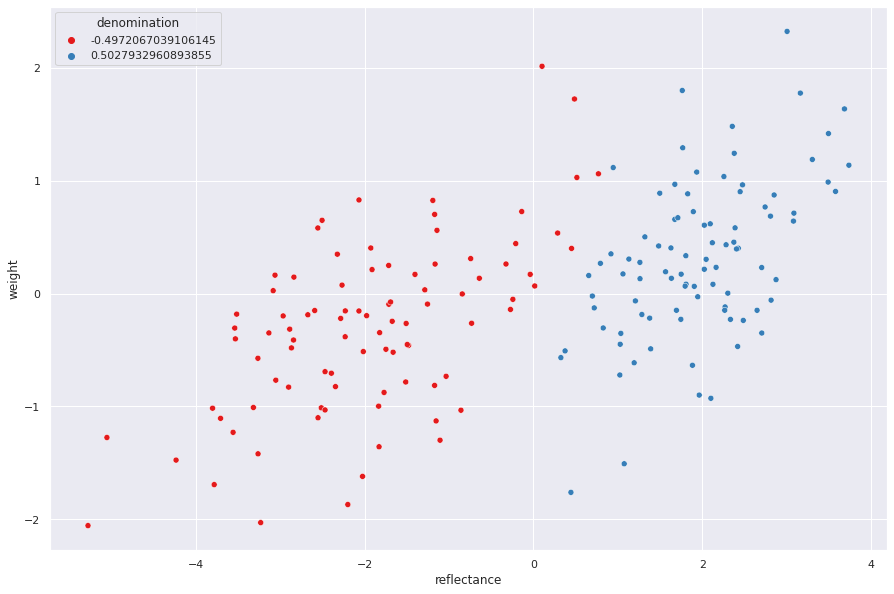

In [3]:
sns.scatterplot(data=data - data.mean(), x="reflectance", y="weight", hue="denomination", palette="Set1")

In [4]:
def classificationError(theta, debug=False):
    rf =  X_train.to_numpy()[:,0]
    wt =  X_train.to_numpy()[:,1]
    
    rf = rf - rf.mean()
    wt = wt - wt.mean()
    
    deno = y_train.to_numpy()
    deno = (((deno > 1) * 1) - 0.5)*2
    
    # print(deno)
    
    vec = np.array([np.cos(theta), np.sin(theta)])
    
    error = 0

    bad_points = []
    for x,y,label in zip(rf,wt,deno):
        goodorbad = label * np.sign(np.dot(vec, [x, y]))
        if goodorbad < 0: 
            bad_points.append((x,y))
        
    return bad_points

In [5]:
angles = np.linspace(0, 2*np.pi , 1000)
bad_points = [ classificationError(a) for a in angles ]
errors = list(map(len,bad_points))

In [6]:
# Load interactive
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets

In [7]:
def trace(idx):
    fig, axes = plt.subplots(1, 2, sharex=False, figsize=(16,6))
    sns.lineplot(ax=axes[1],x=angles, y=errors)
    theta = angles[idx]
    sns.scatterplot(ax=axes[1], x=[theta], y=[errors[idx]], color="red")
    
    X_train_mod = X_train - X_train.mean()
    X_train_mod["denomination"] = (((y_train >1)*1) - 0.5)*2
    sns.scatterplot(ax=axes[0],data=X_train_mod, x="reflectance", y="weight", hue="denomination", palette="Set1")
    axes[0].legend([],[])
    
    axes[0].quiver(0,0,np.cos(theta),np.sin(theta), scale=4)
    
    #axes[0].quiver(0,0,np.sin(theta), - np.cos(theta), scale=1, color="gray", linewidth=0.5)
    #axes[0].quiver(0,0,-np.sin(theta), np.cos(theta), scale=1, color="gray", linewidth=0.5)
    perp = np.array([np.cos(np.pi/2+theta), np.sin(np.pi/2+theta)])*3
    sns.lineplot(ax=axes[0],x=[-perp[0],perp[0]],y=[-perp[1],perp[1]], color="gray")
    
    for p in bad_points[idx]:
        c = plt.Circle(p, color="black", fill=False, radius=0.09)
        axes[0].add_patch(c)
        #plt.title(f"{np.cos(theta),np.sin(theta)}")
    
    # sns.lineplot()

In [8]:
slider = widgets.IntSlider(min=0, max=999, step=1, layout=Layout(width='500px'), value=800)
interact(trace,idx=slider)

interactive(children=(IntSlider(value=800, description='idx', layout=Layout(width='500px'), max=999), Output()…

<function __main__.trace(idx)>

In [9]:
def perceptron(niters,w):
    X_train_mod = X_train - data[["reflectance","weight"]].mean()
    y_train_mod = (y_train - 1.5)*2
    
    
    for i in range(niters):
        global RIDX
        ridx = RIDX[i]
        rX = X_train_mod.iloc[ridx].to_numpy()
        # print(rX)
        ry = y_train_mod.iloc[ridx]
        
        # print(ry)
        # print(np.dot(w,rX)*ry,end=" ")
        
        lastw = w.copy()
        if np.dot(w,rX)*ry < 0:
            w = w + ry*rX
            
        if i == niters-1:
            
            return lastw,rX,ry
                

In [10]:
np.random.seed(11)
W = np.random.rand(2)
RIDX=np.random.choice(len(X_train),500)
# RIDX

In [11]:
def perceptrain(nsteps):
    global W
    ww,rX,ry=perceptron(nsteps,W)
    # print(np.dot(ww,rX)*ry)
    def line(w,x):
        
        # w[0]x + w[1]y = 0
        y = -w[0]*x/w[1]
        return y

    x1,x2 = -5,5
    y1,y2  = line(ww,x1),line(ww,x2)  
    sns.lineplot(x=[x1,x2], y=[y1,y2], color="gray",label='_nolegend_')
    data_mod = data - data.mean()
    data_mod.denomination = ((data_mod.denomination > 0)*1 - 0.5)*2
    sns.scatterplot(data=data_mod, x="reflectance", y="weight", hue="denomination", palette="Set1")
    sns.lineplot(x=[0,rX[0]],y=[0,rX[1]],color="blue" if ry > 0 else "red",label='_nolegend_')
    plt.quiver(0,0,ww[0], ww[1], scale=1,color="green", linewidth=1, scale_units='xy')
    
    plt.ylim([-3,3])
    plt.xlim([-3,3])    

In [12]:
slider2 = widgets.IntSlider(min=1, max=300, step=1, layout=Layout(width='500px'))

play = widgets.Play(
    value=1,
    min=0,
    max=300,
    step=1,
    interval=2000,
    description="Press play",
    disabled=False
)
widgets.jslink((play, 'value'), (slider2, 'value'))
widgets.HBox([play, slider2])
display(play)
interact(perceptrain,nsteps=slider2)

Play(value=1, description='Press play', interval=2000, max=300)

interactive(children=(IntSlider(value=1, description='nsteps', layout=Layout(width='500px'), max=300, min=1), …

<function __main__.perceptrain(nsteps)>